## Data Wrangling Project

## Table of Contents
- [Introduction](#intro)
- [Gathering](#gath)
- [Assessing](#asses)
- [Cleaning](#clean)
- [Visuals](#vis)

<a id='intro'></a>
## Introduction 


In this notebook we will Gather, Assess and Clean data from [@dog_rates](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) account in twitter.

<a id='gath'></a>
## Gathering

In [1]:
import pandas as pd
import numpy as np
import requests 
import tweepy
import json
import os

We will start by importing the `twitter_archive_enhanced.csv`, this file contains information of the tweets we are working with.

In [2]:
#read the csv file
twt_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twt_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
twt_df.shape

(2356, 17)

Secondly, we want to download the file that has all the image predictions for each tweet.
We want to download the image prediction file from this [Site](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). 

In [5]:
#Get the url and save it.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respond = requests.get(url)

In [6]:
# open a new file (if not already existed) ,
# and write the url content in the file with .tsv format
file_name = "image_predictions.tcv"
if not os.path.exists(file_name):
    with open(file_name , mode='wb') as file:
        file.write(respond.content)

In [7]:
#read the created tsv file.
img_prds = pd.read_csv('image_predictions.tcv' , sep='\t')

In [8]:
img_prds.head(2) 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Lastly, we want to extract more data about each tweet like retweets and favourites counts.

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twt_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

We will get this data from `tweet-json.txt` file and convert it to a data frame.

In [9]:
#Read the file to extract the data.
file = open('tweet-json.txt' , 'r')

#Create a dataframe to fill it with the extracted data.
twt_data = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])

In [10]:
#Filling the data frame.
for line in file:
    #convert to json file
    json_tweet = json.loads(line)
    
    #Extract the data
    tweet_id = json_tweet['id_str']
    retweet_count = json_tweet['retweet_count']
    favorite_count = json_tweet['favorite_count']
    
    #Adding data to twt_data
    raw_value = {'tweet_id':tweet_id , 'retweet_count' :retweet_count , 'favorite_count':favorite_count}
    s_value = pd.Series(raw_value)
    twt_data = twt_data.append( s_value, ignore_index=True)

In [11]:
twt_data.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


<a id='asses'></a>
## Assessing

In [12]:
twt_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
img_prds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
twt_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [15]:
twt_df.shape[0], img_prds.shape[0]  ,twt_data.shape[0] 

(2356, 2075, 2354)

In [16]:
twt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
img_prds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [19]:
twt_df.shape[0] - twt_df['tweet_id'].isin(twt_data.tweet_id).sum()

2

In [20]:
twt_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
img_prds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
twt_data.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,676617503762681856,3652,0
freq,1,5,179


In [23]:
twt_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Toby           7
an             7
Buddy          7
Bailey         7
Rusty          6
Leo            6
Oscar          6
Stanley        6
Bella          6
Jack           6
Koda           6
Scout          6
Milo           6
Jax            6
Dave           6
Larry          5
            ... 
Billy          1
Poppy          1
Sweet          1
River          1
Dutch          1
Eevee          1
Hanz           1
Franq          1
Stark          1
Naphaniel      1
Gabby          1
Monster        1
Holly          1
Jaspers        1
Saydee         1
Millie         1
Cecil          1
Mairi          1
Loomis         1
Tuco           1
Kody           1
Bobble         1
Cermet         1
Obie           1
Bloop          1
Sully          1
Tobi           1
Ralphson      

In [24]:
twt_df.tweet_id.duplicated().sum()

0

In [25]:
twt_data.tweet_id.duplicated().sum()

0

In [26]:
img_prds.tweet_id.duplicated().sum()

0

In [27]:
twt_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [28]:
twt_df.query('rating_denominator != 10').shape[0]

23

In [29]:
twt_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
twt_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [31]:
twt_df.query('puppo =="puppo" and pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
twt_df.query('floofer =="floofer" and doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [33]:
twt_df.query('retweeted_status_id !="NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


During the assessment phase we have encountered many issues in Tweitter data archive and Image Prediction dataframes:  
## Quality :
#### `twt_df` issues :
- Change the tweet_id datatype from `integer` to `String`. ✓
- Change the timestamps datatype from `string` to `datatime`. ✓
- Change the retweeted_status_timestamp datatype `string` to `datatime`. ✓
- Change Url with name of the source in the source column. ✓
- Change `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` datatypes from `float` to `String`.
- Change the None to NaN in the doggo, floofer, puppo, and pupper columns. ✓
- Fix the rows value other than 10 in `rating_denominator`. ✓
- Delete any non-ratings data. ✓
- Make rows with `None`, `a`,`the` and `an` in the name column to `NaN`. ✓ 
- Remove retweets because some of the retweets are not from [@dog_rates](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor). ✓
- Delete row if it has more than one dog type (ex .doggo and flooder ). ✓
- Replace rows with rating numerator of ( 75 , 26, 27 ) with (10 , 11 , 11) , and remove any other numerator that is higher than 15. ✓

#### `img_prds` issues :
- Change the tweet_id datatype from `integer` to `String`. ✓
- Delete row if it does not predict a dog (p#_dog false). ✓

#### `twt_data` issues :
- Change `retweet_count` and `favorite_count` columns from string to integer. ✓


## Tidiness :

- Merge `twt_df` with `twt_data` to make all tweet data in one table. ✓
- Delete the tweetes from `twt_df` and `twt_data` that does not have an image predictions. ✓
- Delete the two tweets from `twt_df` and `img_prds` that are not in `twt_data`. ✓
- Make `doggo, floofer, puppo, and pupper` columns into one column dog_type.✓

[**✓ means fixed**]

<a id='clean'></a>
## Cleaning


We will start cleaning by making a copy of each dataframe to ensure we have the original  version of the data.

In [34]:
twt_df_clean = twt_df.copy()
img_prds_clean = img_prds.copy()
twt_data_clean = twt_data.copy()

### Messing data :

##### Define
Change the tweet_id datatype from `integer` to `String` in `twt_df` and `img_prds`

##### Code


In [35]:
twt_df_clean.tweet_id = twt_df_clean.tweet_id.astype(str)
img_prds_clean.tweet_id = img_prds_clean.tweet_id.astype(str)

##### Test


In [36]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [37]:
img_prds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [38]:
twt_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


##### Define
Delete the two tweets from `twt_df` and `img_prds` that are not in `twt_data`.

In [39]:
twt_df_clean[twt_df_clean['tweet_id'].isin(twt_data_clean.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### Code


In [40]:
twt_df_clean = twt_df_clean[twt_df_clean['tweet_id'].isin(twt_data_clean.tweet_id)]
img_prds_clean = img_prds_clean[img_prds_clean['tweet_id'].isin(twt_data_clean.tweet_id)]

##### Test


In [41]:
twt_df_clean['tweet_id'].isin(twt_data_clean.tweet_id).sum() , img_prds_clean['tweet_id'].isin(twt_data_clean.tweet_id).sum()

(2354, 2073)

In [42]:
twt_df_clean.shape[0] ,twt_data_clean.shape[0], img_prds_clean.shape[0]

(2354, 2354, 2073)

##### Define
Delete the tweetes (in `twt_df` and `twt_data`) that does not have an image predictions.


##### Code


In [43]:
img_id = img_prds_clean.tweet_id

In [44]:
twt_df_clean = twt_df_clean[twt_df_clean['tweet_id'].isin(img_id)]
twt_data_clean = twt_data_clean[twt_data_clean['tweet_id'].isin(img_id)]

##### Test


In [45]:
twt_df_clean['tweet_id'].isin(img_id).sum() , twt_data_clean['tweet_id'].isin(img_id).sum() ,img_id.shape[0] 

(2073, 2073, 2073)

In [46]:
twt_df_clean.shape[0] ,twt_data_clean.shape[0], img_id.shape[0]

(2073, 2073, 2073)

### Quality :

##### Define
Change `retweet_count` and `favorite_count` columns from string to integer. 



##### Code


In [47]:
twt_data_clean.favorite_count = twt_data_clean.favorite_count.astype(int) 
twt_data_clean.retweet_count = twt_data_clean.retweet_count.astype(int) 

##### Test


In [48]:
twt_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2073 non-null object
retweet_count     2073 non-null int64
favorite_count    2073 non-null int64
dtypes: int64(2), object(1)
memory usage: 64.8+ KB


##### Define
Change the timestamps datatype from `string` to `datatime`. 



##### Code


In [49]:
twt_df_clean.timestamp = pd.to_datetime(twt_df_clean.timestamp)

##### Test


In [50]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: datetime64[ns](1),

##### Define
Change the retweeted_status_timestamp datatype `string` to `datatime`. 



#### Code

In [51]:
twt_df_clean.retweeted_status_timestamp = pd.to_datetime(twt_df_clean.retweeted_status_timestamp)

##### Test


In [52]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: datetime64

##### Define
Change Url with name of the source in the source column.



#### Code

In [53]:
twt_df_clean.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [54]:
twt_df_clean['source'] = twt_df_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','IPhone')
twt_df_clean['source'] = twt_df_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Web Client')
twt_df_clean['source'] = twt_df_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck')

#### Test

In [55]:
twt_df_clean.source.unique()

array(['IPhone', 'Web Client', 'Tweetdeck'], dtype=object)

##### Define
Change `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` datatypes from `float` to `String`.

#### Code

In [56]:
twt_df_clean.in_reply_to_user_id = twt_df_clean.in_reply_to_user_id.astype(str).replace('nan',np.nan)

In [57]:
twt_df_clean.in_reply_to_status_id = twt_df_clean.in_reply_to_status_id.astype(str).replace('nan',np.nan)

In [58]:
twt_df_clean.retweeted_status_id = twt_df_clean.retweeted_status_id.astype(str).replace('nan',np.nan)

In [59]:
twt_df_clean.retweeted_status_user_id = twt_df_clean.retweeted_status_user_id.astype(str).replace('nan',np.nan)

#### Test

In [60]:
twt_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null object
retweeted_status_user_id      79 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: datetime64[ns]

##### Define
Delete row if it has more than one dog type (ex .doggo and floofer).


##### Code


In [61]:
# make a list of multi types
multi_type = twt_df_clean.loc[(twt_df_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) >1]

In [62]:
twt_df_clean = twt_df_clean[~twt_df_clean.tweet_id.isin(multi_type.tweet_id)]

##### Test


In [63]:
twt_df_clean.loc[(twt_df_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) >1].shape[0]

0

##### Define
Change the None to `NaN` in the doggo, floofer, puppo, and pupper columns.


#### Code 

In [64]:
twt_df_clean.doggo = twt_df_clean.doggo.replace('None',np.nan)
twt_df_clean.floofer = twt_df_clean.floofer.replace('None',np.nan)
twt_df_clean.puppo = twt_df_clean.puppo.replace('None',np.nan)
twt_df_clean.pupper = twt_df_clean.pupper.replace('None',np.nan)

#### Test

In [65]:
twt_df_clean.doggo.unique() , twt_df_clean.floofer.unique() , twt_df_clean.puppo.unique() , twt_df_clean.pupper.unique()

(array([nan, 'doggo'], dtype=object),
 array([nan, 'floofer'], dtype=object),
 array([nan, 'puppo'], dtype=object),
 array([nan, 'pupper'], dtype=object))

##### Define
Fix the rows with value other than 10 in `rating_denominator`, which are mostly  not dog ratings.


##### Code


In [66]:
false_den = twt_df_clean.query('rating_denominator != 10')

In [67]:
index = false_den.index

In [68]:
twt_df_clean = twt_df_clean.drop(index)

#### Test

In [69]:
twt_df_clean.query('rating_denominator != 10').shape[0]

0

##### Define
Make rows with `None`, `a`,`the` and `an` in the name column to `NaN`.



#### Code

In [70]:
# if a name starts with a lower case we would change it to NaN
to_change = twt_df_clean[twt_df_clean.name.str.islower()].index

In [71]:
twt_df_clean.loc[twt_df_clean.index.isin(to_change), 'name'] = np.nan

In [72]:
# None to NaN
twt_df_clean.name = twt_df_clean.name.replace('None',np.nan)

#### Test

In [73]:
twt_df_clean.name.value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Tucker        10
Penny         10
Winston        8
Sadie          8
Lola           8
Bo             8
Daisy          7
Toby           7
Scout          6
Koda           6
Stanley        6
Bella          6
Dave           6
Milo           6
Bailey         6
Jax            6
Rusty          6
Leo            5
Chester        5
Oscar          5
Larry          5
Buddy          5
Louis          5
Alfie          5
Sunny          4
Sophie         4
              ..
Monty          1
Olaf           1
Gustaf         1
Poppy          1
Sweet          1
River          1
Sully          1
Bloop          1
Obie           1
Cermet         1
Christoper     1
Laela          1
Emanuel        1
Grizzwald      1
Godzilla       1
Naphaniel      1
Monster        1
Holly          1
Jaspers        1
Millie         1
Cecil          1
Mairi          1
Stark          1
Dutch          1
Rupert         1
Sierra         1
Kody           1
Kirk          

##### Define
Remove retweets because some of the retweets are not from [@dog_rates](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor), and drop the retweet columns.


##### Code


In [74]:
twt_df_clean = twt_df_clean.query('retweeted_status_id.isnull()', engine='python')

In [75]:
twt_df_clean = twt_df_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

##### Test


In [76]:
twt_df_clean.shape[0]

1965

In [77]:
twt_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,IPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,IPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


##### Define
Delete row if it does not predict a dog (p1_dog is false).


##### Code


In [78]:
img_prds_clean[img_prds_clean.p1_dog == False].shape[0]

542

In [79]:
img_prds_clean = img_prds_clean[img_prds_clean.p1_dog == True]

##### Test


In [80]:
img_prds_clean[img_prds_clean.p1_dog == False].shape[0]

0

##### Define
Replace rows with rating numerator of ( 75 , 26, 27 ) with (10 , 11 , 11) , and remove any other numerator that is higher than 15.


##### Code


In [81]:
twt_df_clean.rating_numerator = twt_df_clean.rating_numerator.replace([26,27],11)
twt_df_clean.rating_numerator = twt_df_clean.rating_numerator.replace(75,10)

In [82]:
twt_df_clean = twt_df_clean[twt_df_clean.rating_numerator <= 15]

##### Test


In [83]:
twt_df_clean.query('rating_numerator >= 15').shape[0]

0

### Tidiness :


##### Define
Merge `twt_df` with `twt_data` to make all tweet data in one dataframe.


##### Code


In [84]:
twt_df_clean = twt_df_clean.merge(twt_data_clean , on='tweet_id')

##### Test


In [85]:
img_prds_clean[img_prds_clean.p1_dog == False].shape[0]

0

##### Define
Make `doggo, floofer, puppo, and pupper` columns into one column dog_type.

##### Code


In [86]:
twt_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,IPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,IPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,9774,41048


In [87]:
twt_df_clean.loc[twt_df_clean['doggo'] == 'doggo' , 'dog_type'] = 'doggo'
twt_df_clean.loc[twt_df_clean['floofer'] == 'floofer' , 'dog_type'] = 'floofer'
twt_df_clean.loc[twt_df_clean['puppo'] == 'puppo' , 'dog_type'] = 'puppo'
twt_df_clean.loc[twt_df_clean['pupper'] == 'pupper' , 'dog_type'] = 'pupper'

In [88]:
twt_df_clean = twt_df_clean.drop(columns=['doggo','floofer','puppo','pupper'])

##### Test


In [89]:
twt_df_clean.dog_type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [90]:
twt_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,IPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,IPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,IPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,3261,20562,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,IPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2158,12041,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,IPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,16716,56848,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,IPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4429,28226,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,IPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711,32467,doggo


### Finalizing :
After fixing all the issues, now we will make sure that after all the deleted rows we have the same tweets in each dataframe.

In [91]:
twt_df_clean.shape[0] , twt_data_clean.shape[0] , img_prds_clean.shape[0]

(1963, 2073, 1531)

We can see that `img_prds` has the less tweets after cleaning , so we will delete any other tweet that are not in `img_prds`.

In [92]:
twt_df_clean = twt_df_clean[twt_df_clean.tweet_id.isin(img_prds_clean.tweet_id)]
twt_data_clean = twt_data_clean[twt_data_clean.tweet_id.isin(img_prds_clean.tweet_id)]

In [93]:
twt_df_clean.shape[0] , twt_data_clean.shape[0] , img_prds_clean.shape[0]

(1452, 1531, 1531)

We will do the same thing again but we will delete tweets that are not in `twt_df_clean`,save the cleaned versions into `csv` files, and lastly we will make a `twitter_archive_master.csv` that contain all the data in one dataframe.

In [94]:
twt_data_clean = twt_data_clean[twt_data_clean.tweet_id.isin(twt_df_clean.tweet_id)]
img_prds_clean = img_prds_clean[img_prds_clean.tweet_id.isin(twt_df_clean.tweet_id)]


In [95]:
twt_df_clean.shape[0] , twt_data_clean.shape[0] , img_prds_clean.shape[0]

(1452, 1452, 1452)

In [96]:
#Save twt_df_clean
twt_df_clean.to_csv('twitter-archive-enhanced-clean.csv' , index=False)

In [97]:
#Save img_prds_clean
img_prds_clean.to_csv('image_predictions_clean.csv', index=False)

In [98]:
twt_master = twt_df_clean.merge(img_prds_clean , on='tweet_id')

In [99]:
#Save twt_master
twt_master.to_csv('twitter-archive-master.csv', index=False)


<a id='vis'></a>
## Visuals 

#### Most rated Dog Breads (Most tweeted):

In [100]:
%matplotlib inline
common_brd = twt_master.p1.value_counts()[:10]

Text(0.5,1,'Most Rated Dog')

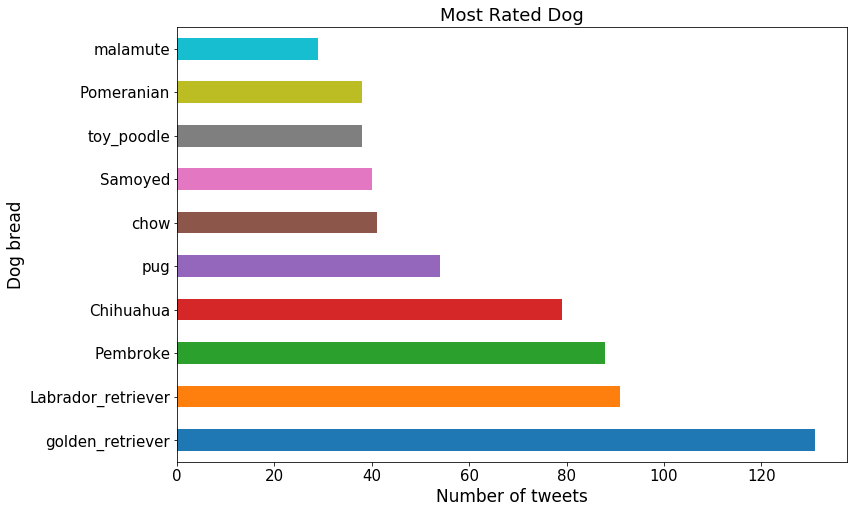

In [101]:
plot1 = common_brd.plot.barh(figsize=(12,8) , title='Most Rated Dogs' , fontsize=15 )
plot1.set_xlabel('Number of tweets' , fontsize=17)
plot1.set_ylabel('Dog bread' , fontsize=17)
plot1.set_title('Most Rated Dog' , fontsize=18)

#### Highest Rated Dog Breads:

In [102]:
#We will extract all the sum and number of the ratings
rating_df = pd.DataFrame()
rating_df['bread'] = twt_master.groupby('p1')['rating_numerator'].sum().index
rating_df['sum'] = twt_master.groupby('p1')['rating_numerator'].sum().values
rating_df['count'] = twt_master.groupby('p1')['rating_numerator'].count().values
rating_df = rating_df.query('count >4 ')
#and we will calculate it by (sum/count)
rating_df['average'] = rating_df['sum'] / rating_df['count']

In [103]:
top_ten = rating_df.sort_values(by='average').tail(10)

In [104]:
top_ten = top_ten.set_index(top_ten.bread)

Text(0.5,1,'Highest Rated Dog Breads')

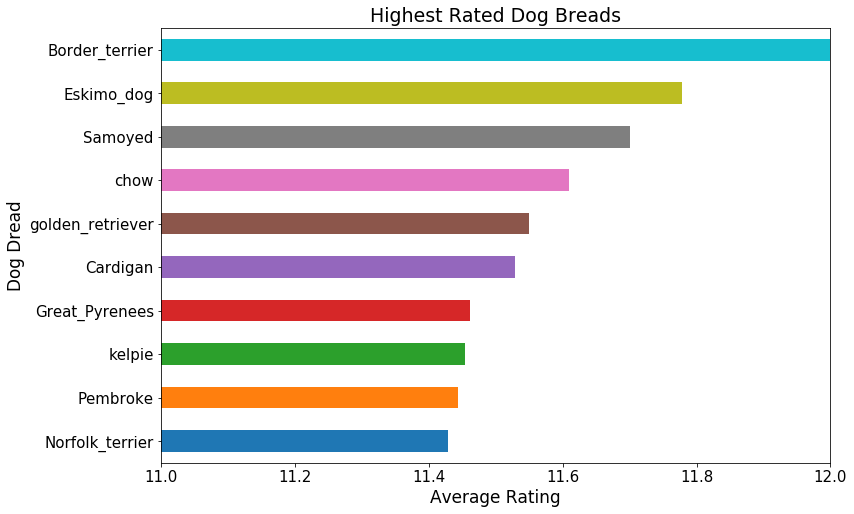

In [105]:
plot2 = top_ten['average'].plot.barh(figsize=(12,8),xlim=(11,12), fontsize=15)
plot2.set_xlabel('Average Rating', fontsize=17)
plot2.set_ylabel('Dog Dread', fontsize=17)
plot2.set_title('Highest Rated Dog Breads',fontsize=19)

#### Community’s  Favorite Dog Breads:

In [106]:
#We will extract all the sum and number of the ratings
fav_df = pd.DataFrame()
fav_df['bread'] = twt_master.groupby('p1')['rating_numerator'].sum().index
fav_df['fav'] = twt_master.groupby('p1')['favorite_count'].sum().values
fav_df['count'] = twt_master.groupby('p1')['rating_numerator'].count().values
fav_df = fav_df.query('count >4 ')
#and we will calculate it by (sum/count)
fav_df['average'] = fav_df['fav'] / fav_df['count']

In [107]:
top_ten2 = fav_df.sort_values(by='average').tail(10)

In [108]:
top_ten2 = top_ten2.set_index(top_ten2.bread)

Text(0.5,1,'Favorite Dog Breads')

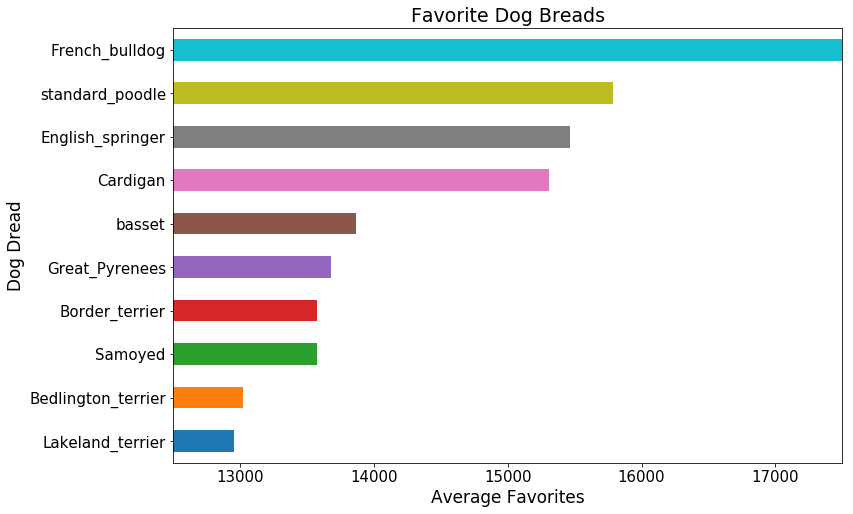

In [109]:
plot3 = top_ten2['average'].plot.barh(figsize=(12,8),xlim=(12500,17500), fontsize=15)
plot3.set_xlabel('Average Favorites', fontsize=17)
plot3.set_ylabel('Dog Dread', fontsize=17)
plot3.set_title('Favorite Dog Breads',fontsize=19)